In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv('train.csv')

In [80]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [82]:
df.shape

(404290, 6)

In [83]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [84]:
df.dropna(subset=['question1','question2'], inplace=True)

In [85]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [86]:
df.duplicated().sum()

0

Count:  is_duplicate
0    255024
1    149263
Name: count, dtype: int64
Percentage:  is_duplicate
0    63.079941
1    36.920059
Name: count, dtype: float64


Text(0, 0.5, 'Count')

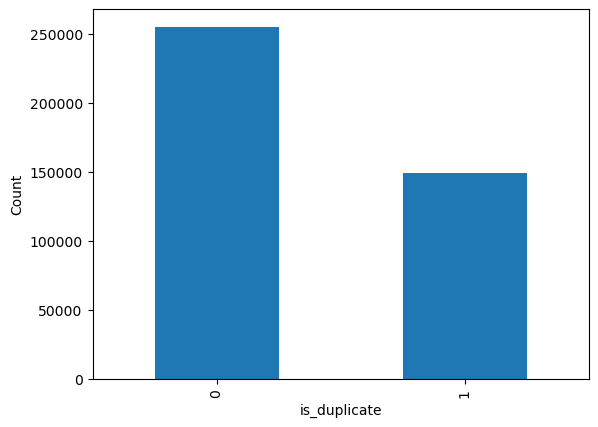

In [87]:
# Distribution of duplicate and non-duplicate questions

print('Count: ',df['is_duplicate'].value_counts())
print('Percentage: ',(df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')
plt.ylabel('Count')


In [88]:
# Number of unique and repeated questions

qid = list(df['question1'].tolist()) + list(df['question2'].tolist())
print("Number of unique questions: ", np.unique(qid).shape[0])
x = pd.Series(qid).value_counts()>1
print("Number of repeated questions: ", x[x].shape[0])

Number of unique questions:  537359
Number of repeated questions:  111870


In [89]:
new_df  = df.sample(50000, random_state=111)

In [90]:
ques_df = new_df[['question1','question2']]
ques_df

,question1,question2
236250,If you were a farmer what would you grow?,"If you were a farmer, what would you grow?"
12182,How can anyone increase height?,How should I increase my height?
263544,How does Quora make money?,"Does Quora make money, if yes then how?"
348603,Why is Saltwater taffy candy imported in China?,Why is Saltwater taffy candy imported in the P...
286958,"In Encapsulation, why is it necessary that an ...",Is productivity the only soul reason of life?
...,...,...
333305,Can a 15 year old go to America alone to study...,Can a 16 year old go to America alone to study...
294137,How can I clear the bank exam after 12th?,How do I clear bank exams?
187603,How does it feel having sex for the first time?,How does sex feel like for the first time?
126438,Do you think Indian governments decision to de...,Was the decision by the Indian Government to d...


In [91]:
# Bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer( max_features=3000, stop_words='english')
questions = list(ques_df['question1'].tolist()) + list(ques_df['question2'].tolist())
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [92]:
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2], axis=1)

In [93]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
236250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263544,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
348603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
294137,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
187603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126438,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
temp_df['is_duplicate'] = new_df['is_duplicate']
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
236250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
263544,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
348603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
286958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
294137,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
187603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
126438,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(temp_df.iloc[:,0:-1].values, temp_df.iloc[:,-1].values, test_size=0.2, random_state=3)

In [96]:
# Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_jobs=-1)

rf.fit(X_train, y_train)

y_predict = rf.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_predict))

Accuracy Score:  0.7205


In [98]:
# XG Boost

In [99]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_jobs=-1)

xgb.fit(X_train, y_train)

y_predict = xgb.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_predict))

Accuracy Score:  0.7102


In [100]:
# Feature engineering

new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [101]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
236250,236250,347125,347126,If you were a farmer what would you grow?,"If you were a farmer, what would you grow?",0,41,42
12182,12182,6069,6614,How can anyone increase height?,How should I increase my height?,1,31,32
263544,263544,63050,26280,How does Quora make money?,"Does Quora make money, if yes then how?",1,26,39
348603,348603,883,22652,Why is Saltwater taffy candy imported in China?,Why is Saltwater taffy candy imported in the P...,1,47,57
286958,286958,407629,407630,"In Encapsulation, why is it necessary that an ...",Is productivity the only soul reason of life?,0,89,45


In [102]:
new_df['q1_words'] = new_df['question1'].apply(lambda x:len( x.split(" ")))
new_df['q2_words'] = new_df['question2'].apply(lambda x:len( x.split(" ")))

In [103]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words
236250,236250,347125,347126,If you were a farmer what would you grow?,"If you were a farmer, what would you grow?",0,41,42,9,9
12182,12182,6069,6614,How can anyone increase height?,How should I increase my height?,1,31,32,5,6
263544,263544,63050,26280,How does Quora make money?,"Does Quora make money, if yes then how?",1,26,39,5,8
348603,348603,883,22652,Why is Saltwater taffy candy imported in China?,Why is Saltwater taffy candy imported in the P...,1,47,57,8,9
286958,286958,407629,407630,"In Encapsulation, why is it necessary that an ...",Is productivity the only soul reason of life?,0,89,45,16,8


In [104]:
def common(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1&w2)

In [105]:
new_df['common_words'] = new_df.apply(common, axis=1)

In [106]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words
236250,236250,347125,347126,If you were a farmer what would you grow?,"If you were a farmer, what would you grow?",0,41,42,9,9,7
12182,12182,6069,6614,How can anyone increase height?,How should I increase my height?,1,31,32,5,6,3
263544,263544,63050,26280,How does Quora make money?,"Does Quora make money, if yes then how?",1,26,39,5,8,3
348603,348603,883,22652,Why is Saltwater taffy candy imported in China?,Why is Saltwater taffy candy imported in the P...,1,47,57,8,9,7
286958,286958,407629,407630,"In Encapsulation, why is it necessary that an ...",Is productivity the only soul reason of life?,0,89,45,16,8,2
...,...,...,...,...,...,...,...,...,...,...,...
333305,333305,460361,460362,Can a 15 year old go to America alone to study...,Can a 16 year old go to America alone to study...,0,76,76,15,15,13
294137,294137,215422,188592,How can I clear the bank exam after 12th?,How do I clear bank exams?,1,41,26,9,6,4
187603,187603,111726,34654,How does it feel having sex for the first time?,How does sex feel like for the first time?,1,47,42,10,9,8
126438,126438,15954,4368,Do you think Indian governments decision to de...,Was the decision by the Indian Government to d...,1,102,101,18,20,10


In [107]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [108]:
new_df['total_words'] = new_df.apply(total_words, axis=1)
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words
236250,236250,347125,347126,If you were a farmer what would you grow?,"If you were a farmer, what would you grow?",0,41,42,9,9,7,16
12182,12182,6069,6614,How can anyone increase height?,How should I increase my height?,1,31,32,5,6,3,11
263544,263544,63050,26280,How does Quora make money?,"Does Quora make money, if yes then how?",1,26,39,5,8,3,13
348603,348603,883,22652,Why is Saltwater taffy candy imported in China?,Why is Saltwater taffy candy imported in the P...,1,47,57,8,9,7,17
286958,286958,407629,407630,"In Encapsulation, why is it necessary that an ...",Is productivity the only soul reason of life?,0,89,45,16,8,2,24
...,...,...,...,...,...,...,...,...,...,...,...,...
333305,333305,460361,460362,Can a 15 year old go to America alone to study...,Can a 16 year old go to America alone to study...,0,76,76,15,15,13,28
294137,294137,215422,188592,How can I clear the bank exam after 12th?,How do I clear bank exams?,1,41,26,9,6,4,15
187603,187603,111726,34654,How does it feel having sex for the first time?,How does sex feel like for the first time?,1,47,42,10,9,8,19
126438,126438,15954,4368,Do you think Indian governments decision to de...,Was the decision by the Indian Government to d...,1,102,101,18,20,10,37


In [109]:
new_df['word_share'] = round(new_df['common_words']/new_df['total_words'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share
236250,236250,347125,347126,If you were a farmer what would you grow?,"If you were a farmer, what would you grow?",0,41,42,9,9,7,16,0.44
12182,12182,6069,6614,How can anyone increase height?,How should I increase my height?,1,31,32,5,6,3,11,0.27
263544,263544,63050,26280,How does Quora make money?,"Does Quora make money, if yes then how?",1,26,39,5,8,3,13,0.23
348603,348603,883,22652,Why is Saltwater taffy candy imported in China?,Why is Saltwater taffy candy imported in the P...,1,47,57,8,9,7,17,0.41
286958,286958,407629,407630,"In Encapsulation, why is it necessary that an ...",Is productivity the only soul reason of life?,0,89,45,16,8,2,24,0.08


Minimum characters:  1
Maximum characters:  430
Average num of characters:  59


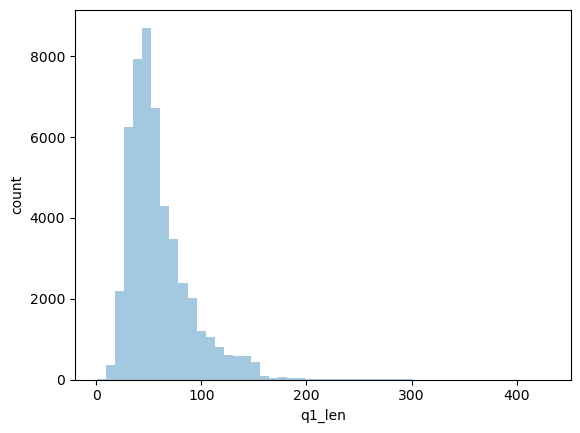

In [110]:
# Analysis of features
import warnings
warnings.filterwarnings('ignore')

sns.distplot(new_df['q1_len'], kde = False)
plt.ylabel('count')
print('Minimum characters: ', new_df['q1_len'].min())
print('Maximum characters: ', new_df['q1_len'].max())
print('Average num of characters: ', int(new_df['q1_len'].mean()))

Minimum characters:  1
Maximum characters:  1169
Average num of characters:  60


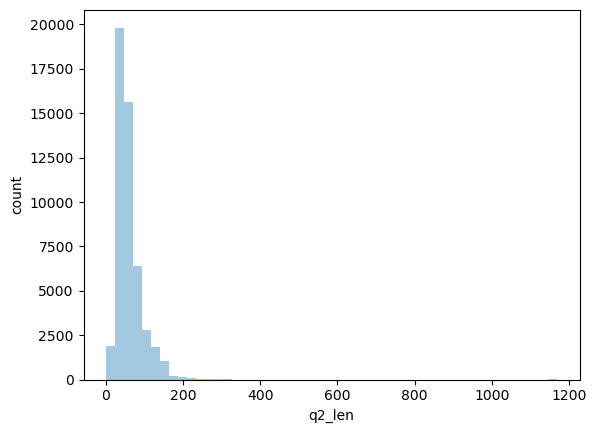

In [111]:
sns.distplot(new_df['q2_len'], kde = False)
plt.ylabel('count')
print('Minimum characters: ', new_df['q2_len'].min())
print('Maximum characters: ', new_df['q2_len'].max())
print('Average num of characters: ', int(new_df['q2_len'].mean()))

Minimum characters:  1
Maximum characters:  81
Average num of characters:  10


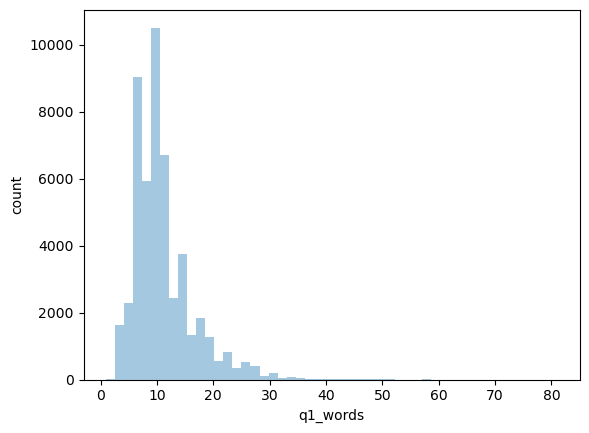

In [112]:
sns.distplot(new_df['q1_words'], kde = False)
plt.ylabel('count')
print('Minimum characters: ', new_df['q1_words'].min())
print('Maximum characters: ', new_df['q1_words'].max())
print('Average num of characters: ', int(new_df['q1_words'].mean()))

Minimum characters:  1
Maximum characters:  237
Average num of characters:  11


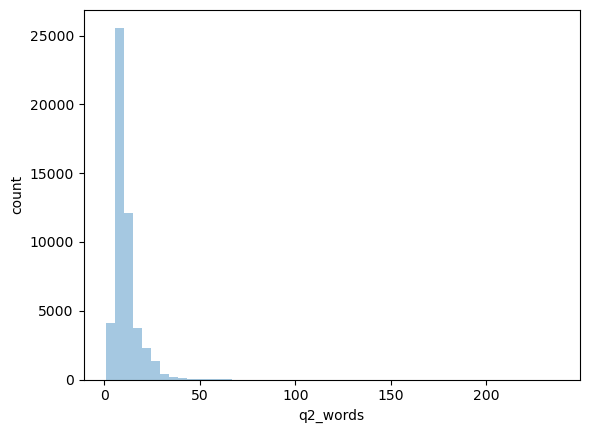

In [113]:
sns.distplot(new_df['q2_words'], kde = False)
plt.ylabel('count')
print('Minimum characters: ', new_df['q2_words'].min())
print('Maximum characters: ', new_df['q2_words'].max())
print('Average num of characters: ', int(new_df['q2_words'].mean()))

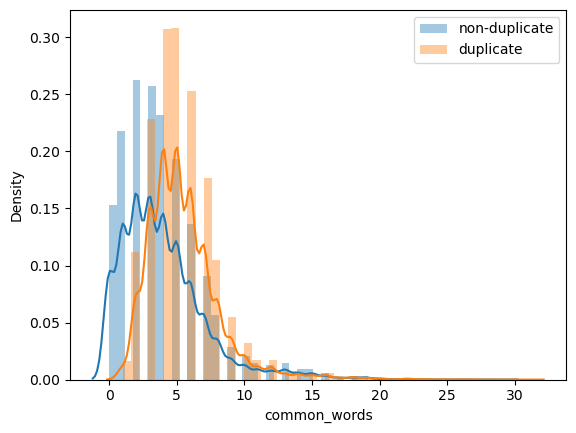

In [114]:
# common words

sns.distplot(new_df[new_df['is_duplicate']==0]['common_words'], label = 'non-duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['common_words'], label = 'duplicate')
plt.legend()
plt.show()

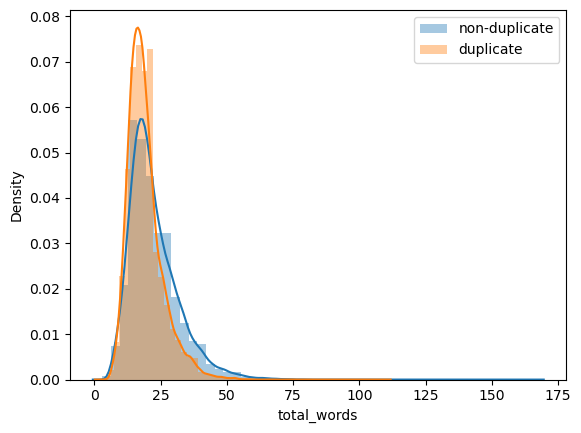

In [115]:
# total words

sns.distplot(new_df[new_df['is_duplicate']==0]['total_words'], label = 'non-duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['total_words'], label = 'duplicate')
plt.legend()
plt.show()

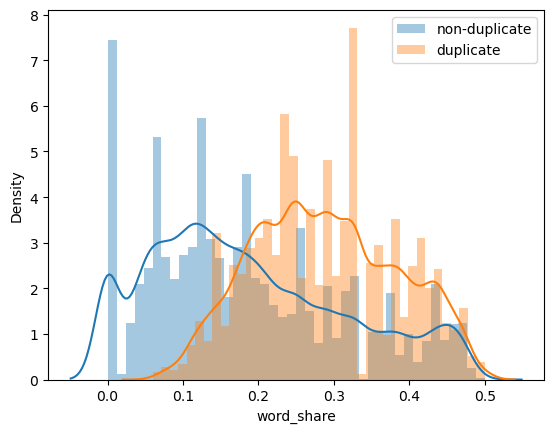

In [116]:
# word share

sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'], label = 'non-duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_share'], label = 'duplicate')
plt.legend()
plt.show()

In [117]:
ques_df

,question1,question2
236250,If you were a farmer what would you grow?,"If you were a farmer, what would you grow?"
12182,How can anyone increase height?,How should I increase my height?
263544,How does Quora make money?,"Does Quora make money, if yes then how?"
348603,Why is Saltwater taffy candy imported in China?,Why is Saltwater taffy candy imported in the P...
286958,"In Encapsulation, why is it necessary that an ...",Is productivity the only soul reason of life?
...,...,...
333305,Can a 15 year old go to America alone to study...,Can a 16 year old go to America alone to study...
294137,How can I clear the bank exam after 12th?,How do I clear bank exams?
187603,How does it feel having sex for the first time?,How does sex feel like for the first time?
126438,Do you think Indian governments decision to de...,Was the decision by the Indian Government to d...


In [118]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df

(50000, 8)


,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share
236250,0,41,42,9,9,7,16,0.44
12182,1,31,32,5,6,3,11,0.27
263544,1,26,39,5,8,3,13,0.23
348603,1,47,57,8,9,7,17,0.41
286958,0,89,45,16,8,2,24,0.08
...,...,...,...,...,...,...,...,...
333305,0,76,76,15,15,13,28,0.46
294137,1,41,26,9,6,4,15,0.27
187603,1,47,42,10,9,8,19,0.42
126438,1,102,101,18,20,10,37,0.27


In [119]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000, stop_words='english')
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [120]:
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2], axis=1)
temp_df.shape

(50000, 6000)

In [121]:
final_df = pd.concat([final_df,temp_df], axis=1)
print(final_df.shape)
final_df.head()

(50000, 6008)


,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
236250,0,41,42,9,9,7,16,0.44,0,0,...,0,0,0,0,0,0,0,0,0,0
12182,1,31,32,5,6,3,11,0.27,0,0,...,0,0,0,0,0,0,0,0,0,0
263544,1,26,39,5,8,3,13,0.23,0,0,...,0,1,0,0,0,0,0,0,0,0
348603,1,47,57,8,9,7,17,0.41,0,0,...,0,0,0,0,0,0,0,0,0,0
286958,0,89,45,16,8,2,24,0.08,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:,1:].values, final_df.iloc[:,0].values, test_size=0.2, random_state=4)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_jobs=-1)

rf.fit(X_train, y_train)

y_predict = rf.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test,y_predict))

Accuracy Score:  0.7686


In [122]:
from xgboost import XGBRFClassifier

xgb = XGBClassifier(n_jobs=-1)

xgb.fit(X_train, y_train)

y_predict = xgb.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test,y_predict))

Accuracy Score:  0.7102


In [123]:
# Building models with pre-processing
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share
236250,236250,347125,347126,If you were a farmer what would you grow?,"If you were a farmer, what would you grow?",0,41,42,9,9,7,16,0.44
12182,12182,6069,6614,How can anyone increase height?,How should I increase my height?,1,31,32,5,6,3,11,0.27
263544,263544,63050,26280,How does Quora make money?,"Does Quora make money, if yes then how?",1,26,39,5,8,3,13,0.23
348603,348603,883,22652,Why is Saltwater taffy candy imported in China?,Why is Saltwater taffy candy imported in the P...,1,47,57,8,9,7,17,0.41
286958,286958,407629,407630,"In Encapsulation, why is it necessary that an ...",Is productivity the only soul reason of life?,0,89,45,16,8,2,24,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333305,333305,460361,460362,Can a 15 year old go to America alone to study...,Can a 16 year old go to America alone to study...,0,76,76,15,15,13,28,0.46
294137,294137,215422,188592,How can I clear the bank exam after 12th?,How do I clear bank exams?,1,41,26,9,6,4,15,0.27
187603,187603,111726,34654,How does it feel having sex for the first time?,How does sex feel like for the first time?,1,47,42,10,9,8,19,0.42
126438,126438,15954,4368,Do you think Indian governments decision to de...,Was the decision by the Indian Government to d...,1,102,101,18,20,10,37,0.27


In [124]:
import re
from bs4 import BeautifulSoup

In [255]:
def preprocess(q):
    q = str(q).lower().strip()
    
    # Replace few special characters with their spring equivalents
    q = q.replace('%', 'percent')
    q = q.replace('$', 'dollar')
    q = q.replace('₹', 'rupee')
    q = q.replace('€', 'euro')
    q = q.replace('@', 'at')
    
    # the pattern '[math]' appears around 900 times in the whole dataset
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9+]000000000)', r'\1b', q)
    q = re.sub(r'([0-9+]000000)', r'\1m', q)
    q = re.sub(r'([0-9+]000)', r'\1k', q)
    
    # Decontracting words
    contraction = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"}
    
    q_decontracted = []
    
    for word in q.split():
        if word in contraction:
            word = contraction[word]
        
        q_decontracted.append(word)
        
    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q, 'html.parser')
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\w')
    q = re.sub(r'[^a-zA-Z0-9]', ' ', q).strip()
    
    return q

In [256]:
preprocess("I've already! wasn't <b>done</b>?")

'she is been acting weird'

In [127]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [128]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share
236250,236250,347125,347126,if you were a farmer what would you grow,if you were a farmer what would you grow,0,41,42,9,9,7,16,0.44
12182,12182,6069,6614,how can anyone increase height,how should i increase my height,1,31,32,5,6,3,11,0.27
263544,263544,63050,26280,how does quora make money,does quora make money if yes then how,1,26,39,5,8,3,13,0.23
348603,348603,883,22652,why is saltwater taffy candy imported in china,why is saltwater taffy candy imported in the p...,1,47,57,8,9,7,17,0.41
286958,286958,407629,407630,in encapsulation why is it necessary that an ...,is productivity the only soul reason of life,0,89,45,16,8,2,24,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333305,333305,460361,460362,can a 15 year old go to america alone to study...,can a 16 year old go to america alone to study...,0,76,76,15,15,13,28,0.46
294137,294137,215422,188592,how can i clear the bank exam after 12th,how do i clear bank exams,1,41,26,9,6,4,15,0.27
187603,187603,111726,34654,how does it feel having sex for the first time,how does sex feel like for the first time,1,47,42,10,9,8,19,0.42
126438,126438,15954,4368,do you think indian governments decision to de...,was the decision by the indian government to d...,1,102,101,18,20,10,37,0.27


In [129]:
# Advanced Features
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def fetch_token_features(row):
    SAFE_DIV = 0.0001
    
    q1 = row['question1']
    q2 = row['question2']
    
    STOP_WORDS = stopwords.words('english')
    
    token_features = [0.0]*8
    
    # COnverting the sentence to tokens
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features
    
    # Get the non-stopwords from question pairs
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stop words from question pairs
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # get the count of commomn non-stopwords from question pairs
    common_word_count = len(q1_words.intersection(q2_words))
    
    # get the count of commomn non-stopwords from question pairs
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # get the count of commomn non-stopwords from question pairs
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    token_features[0] = common_word_count/(min(len(q1_words),len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count/(max(len(q1_words),len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count/(min(len(q1_stops),len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count/(max(len(q1_stops),len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count/(min(len(q1_tokens),len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count/(max(len(q1_tokens),len(q2_tokens)) + SAFE_DIV)
    
    # Last word equivalent
    token_features[6] = int(q1_tokens[-1]==q2_tokens[-1])
    
    # First word equivalent
    token_features[7] = int(q1_tokens[0]==q2_tokens[0])
    
    return token_features

[nltk_data] Downloading package stopwords to C:\Users\Vipina
[nltk_data]     m\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [130]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df['cwc_min'] = list(map(lambda x: x[0], token_features))
new_df['cwc_max'] = list(map(lambda x: x[1], token_features))
new_df['csc_min'] = list(map(lambda x: x[2], token_features))
new_df['csc_max'] = list(map(lambda x: x[3], token_features))
new_df['ctc_min'] = list(map(lambda x: x[4], token_features))
new_df['ctc_max'] = list(map(lambda x: x[5], token_features))
new_df['last_word_eq'] = list(map(lambda x: x[6], token_features))
new_df['first_word_eq'] = list(map(lambda x: x[7], token_features))

In [131]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,...,total_words,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
236250,236250,347125,347126,if you were a farmer what would you grow,if you were a farmer what would you grow,0,41,42,9,9,...,16,0.44,0.999967,0.999967,0.999980,0.999980,0.888879,0.888879,1.0,1.0
12182,12182,6069,6614,how can anyone increase height,how should i increase my height,1,31,32,5,6,...,11,0.27,0.999950,0.666644,0.499975,0.249994,0.599988,0.499992,1.0,1.0
263544,263544,63050,26280,how does quora make money,does quora make money if yes then how,1,26,39,5,8,...,13,0.23,0.999967,0.749981,0.999950,0.499988,0.999980,0.624992,0.0,0.0
348603,348603,883,22652,why is saltwater taffy candy imported in china,why is saltwater taffy candy imported in the p...,1,47,57,8,9,...,17,0.41,0.799984,0.799984,0.999967,0.749981,0.874989,0.777769,0.0,1.0
286958,286958,407629,407630,in encapsulation why is it necessary that an ...,is productivity the only soul reason of life,0,89,45,16,8,...,24,0.08,0.000000,0.000000,0.499988,0.181817,0.249997,0.124999,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333305,333305,460361,460362,can a 15 year old go to america alone to study...,can a 16 year old go to america alone to study...,0,76,76,15,15,...,28,0.46,0.888879,0.888879,0.999980,0.999980,0.866661,0.866661,1.0,1.0
294137,294137,215422,188592,how can i clear the bank exam after 12th,how do i clear bank exams,1,41,26,9,6,...,15,0.27,0.666644,0.499988,0.666644,0.399992,0.666656,0.444440,0.0,1.0
187603,187603,111726,34654,how does it feel having sex for the first time,how does sex feel like for the first time,1,47,42,10,9,...,19,0.42,0.999975,0.799984,0.999975,0.666656,0.888879,0.799992,1.0,1.0
126438,126438,15954,4368,do you think indian governments decision to de...,was the decision by the indian government to d...,1,102,101,18,20,...,37,0.27,0.499995,0.454541,0.714276,0.555549,0.555552,0.499998,0.0,0.0


In [132]:
pip install distance

Note: you may need to restart the kernel to use updated packages.


In [133]:
# Length features
import distance

def fetch_length_feature(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # converting the sentence into tokens
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return length_features
    
    #Absolute length feature
    length_features[0] = abs(len(q1_tokens)-len(q2_tokens))
    
    # Average token length of both questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    strs = list(distance.lcsubstrings(q1,q2))
    if strs:
        length_features[2] = len(strs[0])/(min(len(q1),len(q2))+1)
    
    return length_features

In [134]:
length_features = new_df.apply(fetch_length_feature, axis=1)

new_df['abs_length_diff'] = list(map(lambda x:x[0], length_features))
new_df['average_len'] = list(map(lambda x:x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x:x[2], length_features))

In [135]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_length_diff,average_len,longest_substr_ratio
236250,236250,347125,347126,if you were a farmer what would you grow,if you were a farmer what would you grow,0,41,42,9,9,...,0.999967,0.999980,0.999980,0.888879,0.888879,1.0,1.0,0.0,9.0,0.512195
12182,12182,6069,6614,how can anyone increase height,how should i increase my height,1,31,32,5,6,...,0.666644,0.499975,0.249994,0.599988,0.499992,1.0,1.0,1.0,5.5,0.322581
263544,263544,63050,26280,how does quora make money,does quora make money if yes then how,1,26,39,5,8,...,0.749981,0.999950,0.499988,0.999980,0.624992,0.0,0.0,3.0,6.5,0.807692
348603,348603,883,22652,why is saltwater taffy candy imported in china,why is saltwater taffy candy imported in the p...,1,47,57,8,9,...,0.799984,0.999967,0.749981,0.874989,0.777769,0.0,1.0,1.0,8.5,0.872340
286958,286958,407629,407630,in encapsulation why is it necessary that an ...,is productivity the only soul reason of life,0,89,45,16,8,...,0.000000,0.499988,0.181817,0.249997,0.124999,0.0,0.0,8.0,12.0,0.133333


In [136]:
# fuzzy features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz ratio
    fuzzy_features[0] = fuzz.QRatio(q1,q2)
    
    # fuzz partial ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1,q2)
    
    # token sort ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1,q2)
    
    # token set ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1,q2)
    
    return fuzzy_features

In [137]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [307]:
print(new_df.shape)
new_df.head()

(50000, 28)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,...,ctc_max,last_word_eq,first_word_eq,abs_length_diff,average_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
236250,236250,347125,347126,if you were a farmer what would you grow,if you were a farmer what would you grow,0,41,42,9,9,...,0.888879,1.0,1.0,0.0,9.0,0.512195,99,98,100,100
12182,12182,6069,6614,how can anyone increase height,how should i increase my height,1,31,32,5,6,...,0.499992,1.0,1.0,1.0,5.5,0.322581,69,67,62,78
263544,263544,63050,26280,how does quora make money,does quora make money if yes then how,1,26,39,5,8,...,0.624992,0.0,0.0,3.0,6.5,0.807692,67,84,81,100
348603,348603,883,22652,why is saltwater taffy candy imported in china,why is saltwater taffy candy imported in the p...,1,47,57,8,9,...,0.777769,0.0,1.0,1.0,8.5,0.872340,86,91,78,93
286958,286958,407629,407630,in encapsulation why is it necessary that an ...,is productivity the only soul reason of life,0,89,45,16,8,...,0.124999,0.0,0.0,8.0,12.0,0.133333,33,39,32,38


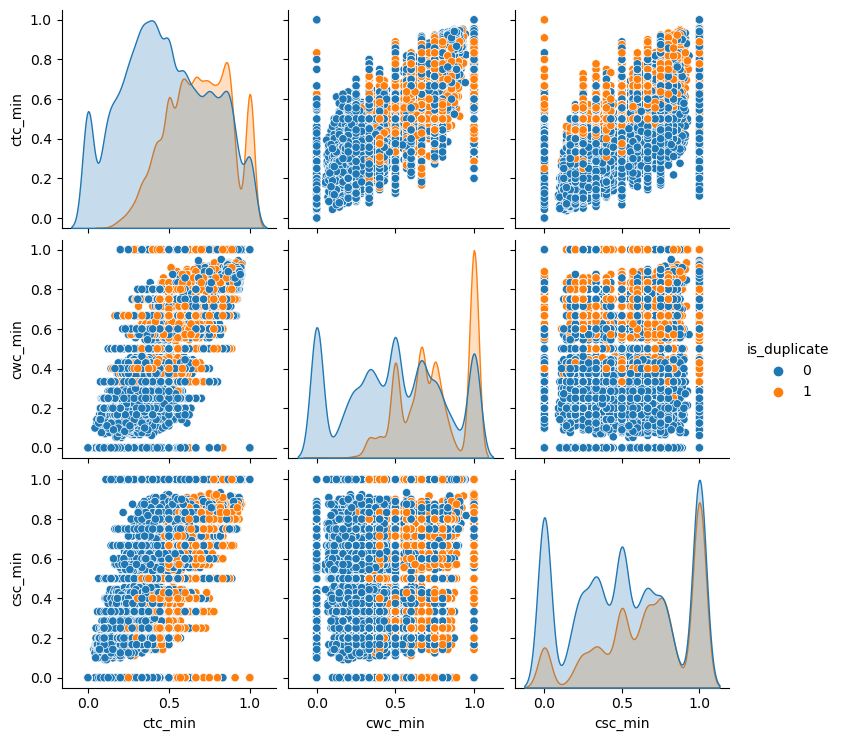

In [139]:
sns.pairplot(new_df[['ctc_min','cwc_min','csc_min','is_duplicate']], hue='is_duplicate')

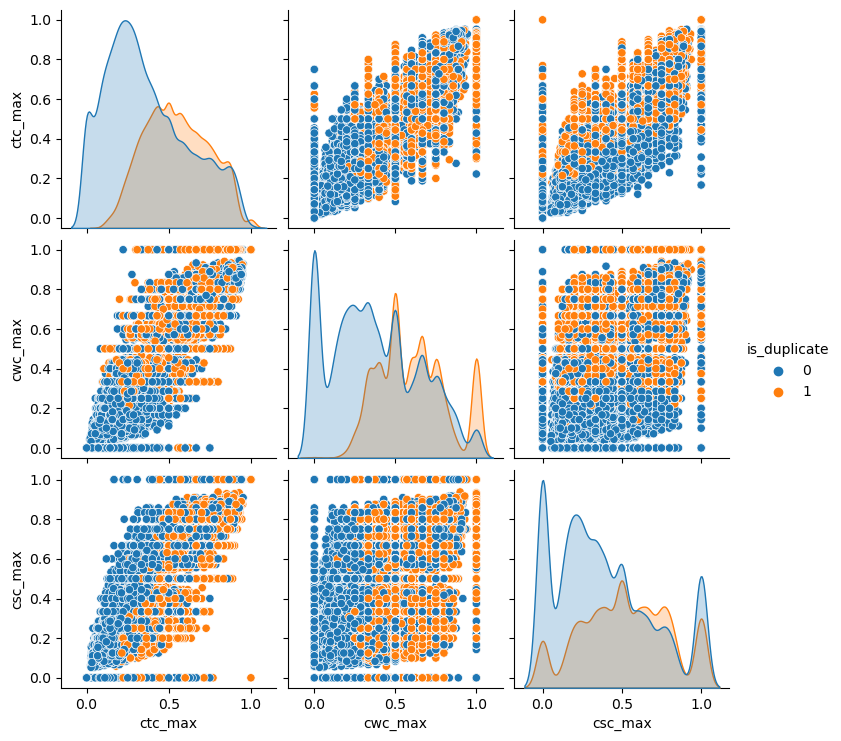

In [140]:
sns.pairplot(new_df[['ctc_max','cwc_max','csc_max','is_duplicate']], hue='is_duplicate')

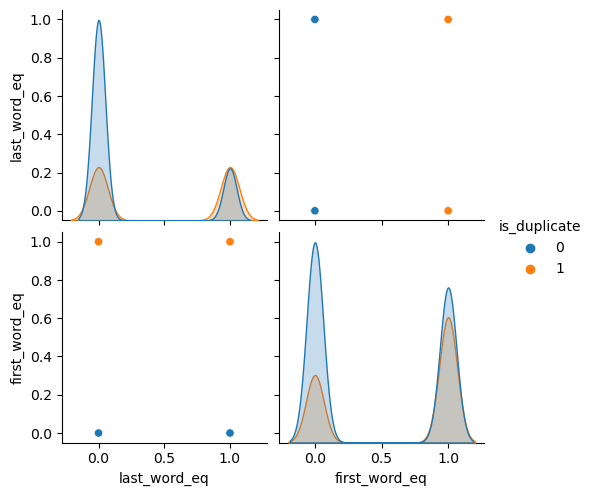

In [141]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']], hue='is_duplicate')

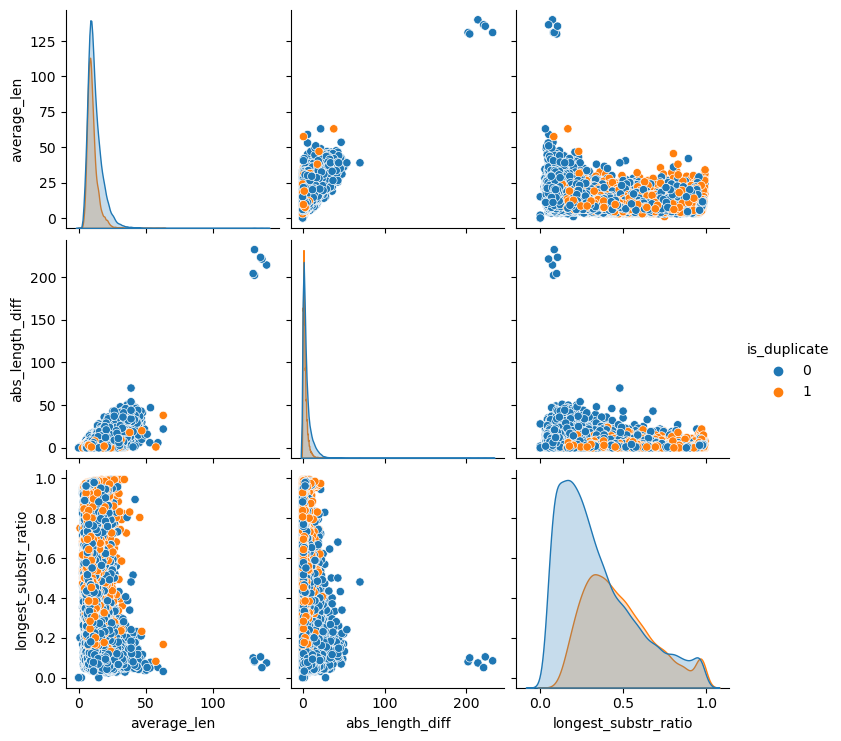

In [142]:
sns.pairplot(new_df[['average_len','abs_length_diff','longest_substr_ratio', 'is_duplicate']], hue='is_duplicate')

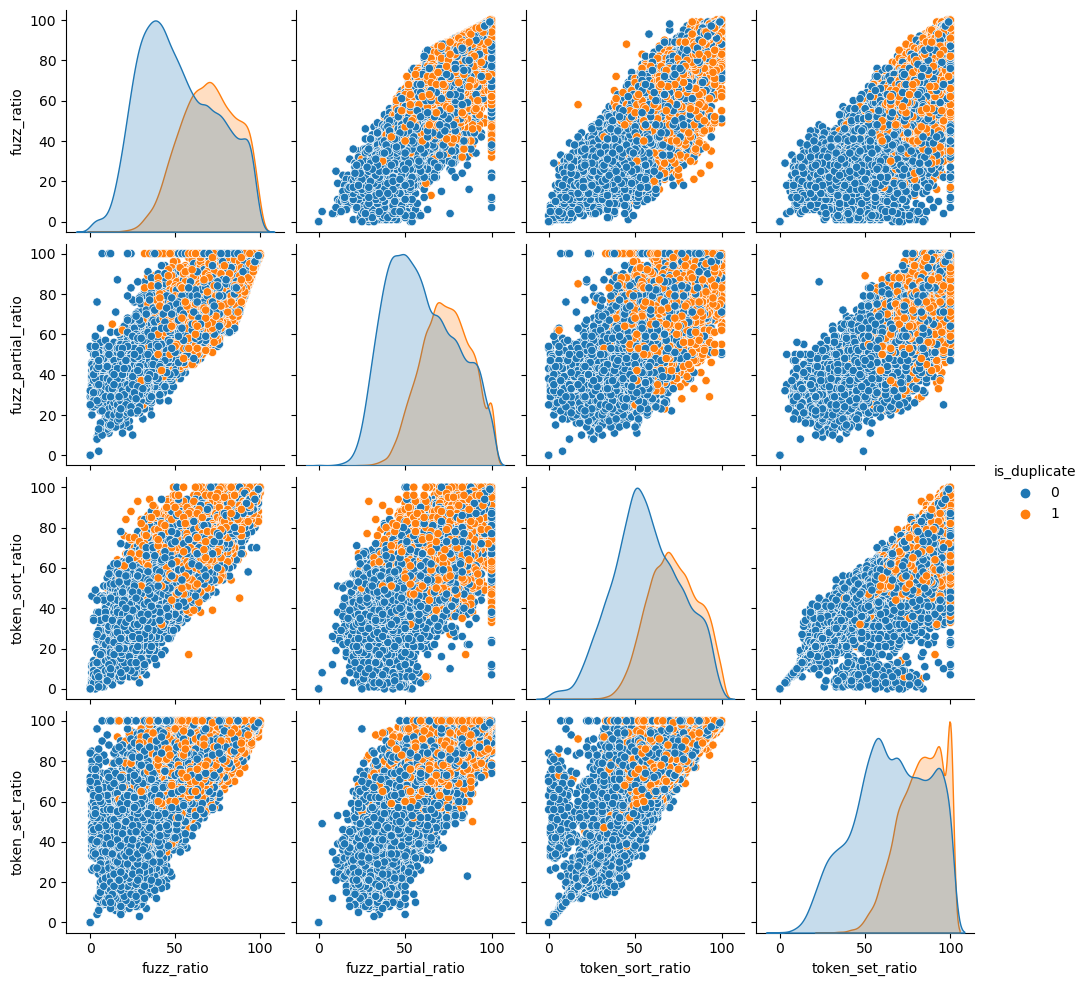

In [143]:
sns.pairplot(new_df[['fuzz_ratio','fuzz_partial_ratio','token_sort_ratio','token_set_ratio','is_duplicate']], hue='is_duplicate')

In [144]:
ques_df

,question1,question2
236250,If you were a farmer what would you grow?,"If you were a farmer, what would you grow?"
12182,How can anyone increase height?,How should I increase my height?
263544,How does Quora make money?,"Does Quora make money, if yes then how?"
348603,Why is Saltwater taffy candy imported in China?,Why is Saltwater taffy candy imported in the P...
286958,"In Encapsulation, why is it necessary that an ...",Is productivity the only soul reason of life?
...,...,...
333305,Can a 15 year old go to America alone to study...,Can a 16 year old go to America alone to study...
294137,How can I clear the bank exam after 12th?,How do I clear bank exams?
187603,How does it feel having sex for the first time?,How does sex feel like for the first time?
126438,Do you think Indian governments decision to de...,Was the decision by the Indian Government to d...


In [145]:
final_df = new_df.drop(columns = ['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df

(50000, 23)


,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_length_diff,average_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
236250,0,41,42,9,9,7,16,0.44,0.999967,0.999967,...,0.888879,1.0,1.0,0.0,9.0,0.512195,99,98,100,100
12182,1,31,32,5,6,3,11,0.27,0.999950,0.666644,...,0.499992,1.0,1.0,1.0,5.5,0.322581,69,67,62,78
263544,1,26,39,5,8,3,13,0.23,0.999967,0.749981,...,0.624992,0.0,0.0,3.0,6.5,0.807692,67,84,81,100
348603,1,47,57,8,9,7,17,0.41,0.799984,0.799984,...,0.777769,0.0,1.0,1.0,8.5,0.872340,86,91,78,93
286958,0,89,45,16,8,2,24,0.08,0.000000,0.000000,...,0.124999,0.0,0.0,8.0,12.0,0.133333,33,39,32,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333305,0,76,76,15,15,13,28,0.46,0.888879,0.888879,...,0.866661,1.0,1.0,0.0,15.0,0.881579,99,99,99,99
294137,1,41,26,9,6,4,15,0.27,0.666644,0.499988,...,0.444440,0.0,1.0,3.0,7.5,0.384615,68,72,65,78
187603,1,47,42,10,9,8,19,0.42,0.999975,0.799984,...,0.799992,1.0,1.0,1.0,9.5,0.452381,83,76,87,94
126438,1,102,101,18,20,10,37,0.27,0.499995,0.454541,...,0.499998,0.0,0.0,2.0,19.0,0.176471,63,64,75,76


In [146]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
236250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263544,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
348603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
294137,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
187603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126438,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
final_df = pd.concat([final_df,temp_df], axis=1)
print(final_df.shape)
final_df

(50000, 6023)


,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
236250,0,41,42,9,9,7,16,0.44,0.999967,0.999967,...,0,0,0,0,0,0,0,0,0,0
12182,1,31,32,5,6,3,11,0.27,0.999950,0.666644,...,0,0,0,0,0,0,0,0,0,0
263544,1,26,39,5,8,3,13,0.23,0.999967,0.749981,...,0,1,0,0,0,0,0,0,0,0
348603,1,47,57,8,9,7,17,0.41,0.799984,0.799984,...,0,0,0,0,0,0,0,0,0,0
286958,0,89,45,16,8,2,24,0.08,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333305,0,76,76,15,15,13,28,0.46,0.888879,0.888879,...,0,0,0,0,0,0,0,0,0,0
294137,1,41,26,9,6,4,15,0.27,0.666644,0.499988,...,0,0,0,0,0,0,0,0,0,0
187603,1,47,42,10,9,8,19,0.42,0.999975,0.799984,...,0,0,0,0,0,0,0,0,0,0
126438,1,102,101,18,20,10,37,0.27,0.499995,0.454541,...,0,0,0,0,0,0,0,0,0,0


In [148]:
X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:,1:].values, final_df.iloc[:,0].values, test_size=0.2, random_state=4)

In [149]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_jobs=-1)

rf.fit(X_train, y_train)

y_predict = rf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_predict))

Accuracy:  0.7927


In [150]:
#XGB
from xgboost import XGBClassifier

xgb = XGBClassifier(n_jobs=-1)

xgb.fit(X_train, y_train)

y_predict1 = xgb.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_predict))

Accuracy:  0.7927


In [151]:
from sklearn.metrics import confusion_matrix

#Random Forest
print("Accuracy: ", confusion_matrix(y_test, y_predict))
print("------------------------------------------------")

# xgboost
print("Accuracy: ", confusion_matrix(y_test, y_predict1))

Accuracy:  [[5336  952]
 [1121 2591]]
------------------------------------------------
Accuracy:  [[5256 1032]
 [1004 2708]]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

sample_df = final_df.sample(30000, random_state=7)
sampled_data = sample_df.sample(frac=0.1, random_state=111)

X_train, X_test, y_train, y_test = train_test_split(sample_df.iloc[:, 1:].values, sample_df.iloc[:, 0].values, test_size=0.2, random_state=4)

pca = PCA(n_components=100)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)

rf = RandomForestClassifier(random_state=5)

rf_params = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy', refit=True, n_jobs=-1)  # Set n_jobs=-1
rf_grid.fit(X_train, y_train)

# Print the best parameters and the best accuracy for random forest
best_rf_model = rf_grid.best_estimator_
print("Random Forest - Best Parameters: ", best_rf_model.get_params())
print("Random Forest - Best Accuracy: ", rf_grid.best_score_)

# Predict using the best random forest model
y_predict = best_rf_model.predict(X_test)
print("------------------------------------------------")
print("Accuracy: ", accuracy_score(y_test, y_predict))


In [ ]:
final_df

In [ ]:
xgb = XGBClassifier(random_state=6)

xgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, score='accuracy')
xgb_grid.fit(X_train, y_train)

# Print the best parameters and best accuracy for XGBoost
print("XGB - Best parameters: ", xgb_grid.best_params_)
print("XGB - Best Accuracy: ", xgb_grid.best_score_)

xgb_best_model = xgb_grid.best_estimator_
y_predict1 = xgb_best_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_predict1))

In [215]:
# functions to convert questions to vectors


def test_token_features(q1,q2):
    from nltk.corpus import stopwords
    SAFE_DIV = 0.0001
    
    STOP_WORDS = stopwords.words('english')
    
    token_features = [0.0]*8
    
    # COnverting the sentence to tokens
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features
    
    # Get the non-stopwords from question pairs
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stop words from question pairs
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # get the count of commomn non-stopwords from question pairs
    common_word_count = len(q1_words.intersection(q2_words))
    
    # get the count of commomn non-stopwords from question pairs
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # get the count of commomn non-stopwords from question pairs
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    token_features[0] = common_word_count/(min(len(q1_words),len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count/(max(len(q1_words),len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count/(min(len(q1_stops),len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count/(max(len(q1_stops),len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count/(min(len(q1_tokens),len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count/(max(len(q1_tokens),len(q2_tokens)) + SAFE_DIV)
    
    # Last word equivalent
    token_features[6] = int(q1_tokens[-1]==q2_tokens[-1])
    
    # First word equivalent
    token_features[7] = int(q1_tokens[0]==q2_tokens[0])
    
    return token_features

In [220]:
def test_length_features(q1,q2):
    import distance
    length_features = [0.0]*3
    
    # converting the sentence into tokens
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return length_features
    
    #Absolute length feature
    length_features[0] = abs(len(q1_tokens)-len(q2_tokens))
    
    # Average token length of both questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    strs = list(distance.lcsubstrings(q1,q2))
    if strs:
        length_features[2] = len(strs[0])/(min(len(q1),len(q2))+1)
    
    return length_features

In [224]:
def test_fuzzy_features(q1,q2):
    from fuzzywuzzy import fuzz
    
    fuzzy_features = [0.0]*4
    
    # fuzz ratio
    fuzzy_features[0] = fuzz.QRatio(q1,q2)
    
    # fuzz partial ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1,q2)
    
    # token sort ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1,q2)
    
    # token set ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1,q2)
    
    return fuzzy_features

In [285]:
# A function to convert two questions into vector format

def convert2vec(Q1,Q2):
    input_query = []
    Q1 = preprocess(Q1)
    Q2 = preprocess(Q2)
    
    # Fetch the bag of words
    vector1 = np.array(cv.transform([Q1]).toarray())
    vector2 = np.array(cv.transform([Q2]).toarray())
   
    # Fetch basic features
    input_query.append(len(str(Q1)))
    input_query.append(len(str(Q2)))
    input_query.append(len(Q1.split(" ")))
    input_query.append(len(Q2.split(" ")))
    words_common = len(set(Q1.split(" ")) & set(Q2.split(" ")))
    total_words = len(set(Q1.split(" "))) + len(set(Q2.split(" ")))
    input_query.append(words_common)
    input_query.append(total_words)
    input_query.append(round((words_common/total_words),2))
    
    # Fetch token features
    token_features = test_token_features(Q1,Q2)
    input_query.extend(token_features)
    
    # Fetch length featues
    length_features = test_length_features(Q1,Q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fuzzy_features(Q1,Q2)
    input_query.extend(fuzzy_features)
    
    return np.hstack((np.array(input_query).reshape(1,22),vector1,vector2))

In [305]:
def is_duplicate(q1, q2):
    input_data = convert2vec(q1, q2)
    res = rf.predict(input_data)[0]

    if res == 0:
        return "Not Duplicate"
    else:
        return "Duplicate"

In [304]:
print("Enter question pair.\n")
q1 = input("Enter Question 1: ")
q2 = input("Enter Question 2: ")

result = is_duplicate(q1, q2)
print("Result:", result)

Enter question pair.

Enter Question 1: Who is the greatest cricketer of all time?
Enter Question 2: Is sachin tendulkar called the greatest cricketer of all time?
Result: Duplicate
